# Ventas de Videojuegos hasta 2016
### La base de datos muestra el historico de ventas anuales de videojuegos en millones de diversas plataformas, divididas por región, consola, plataforma y desarrollador.

In [24]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = 'Video_Games_Sales_as_at_22_Dec_2016.csv'
df = pd.read_csv(path)
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         7590 non-null float64
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [10]:
df.shape

(16719, 16)

In [11]:
df.isnull().any().any()

True

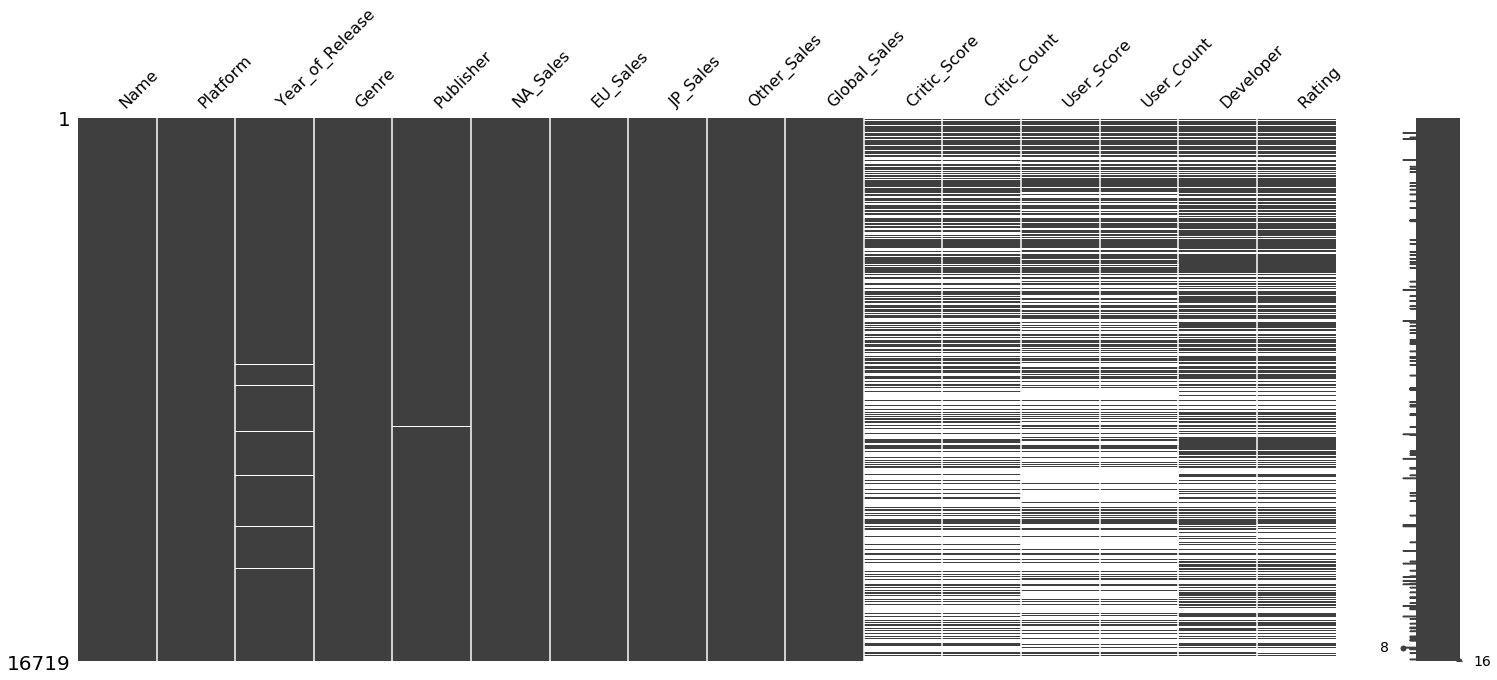

In [12]:
msno.matrix(df)

In [13]:
df.replace({' ': np.nan}, inplace=True)

In [14]:
df.isnull().any().any()

True

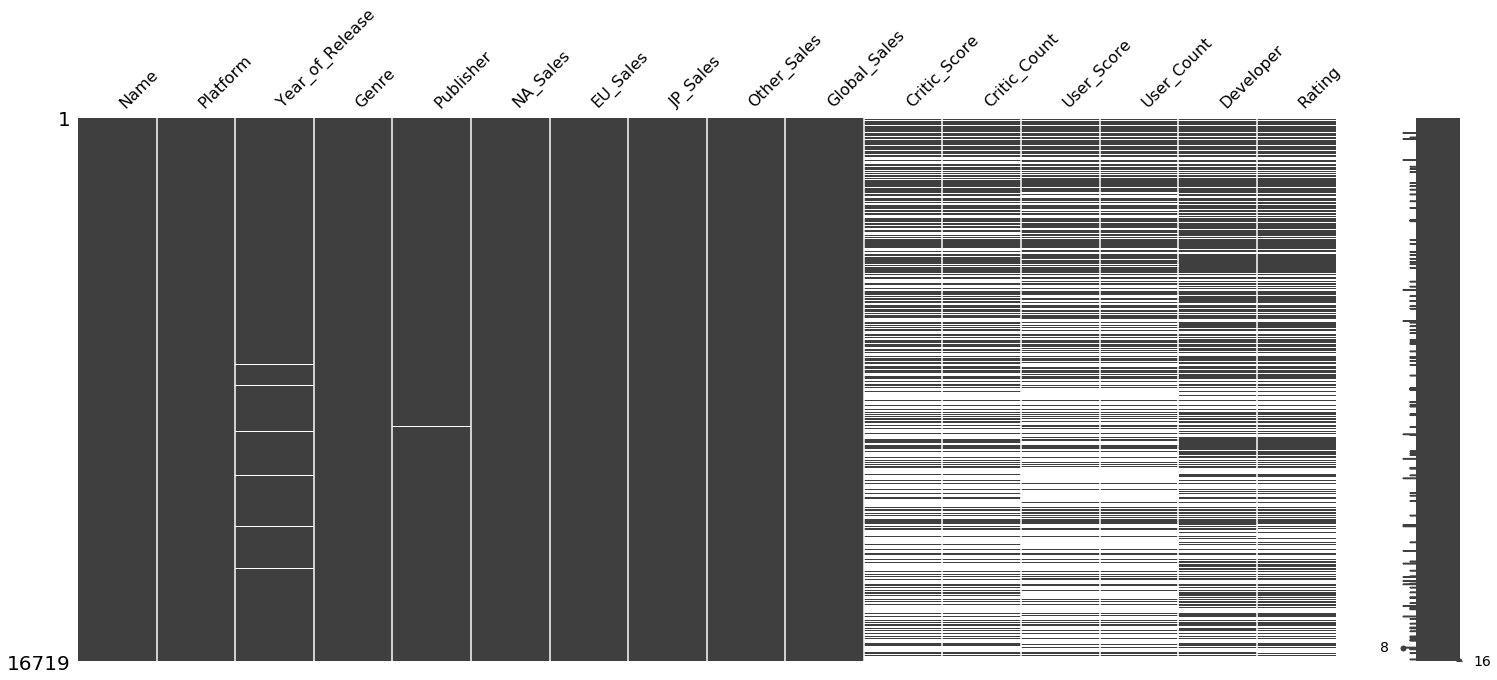

In [15]:
msno.matrix(df)

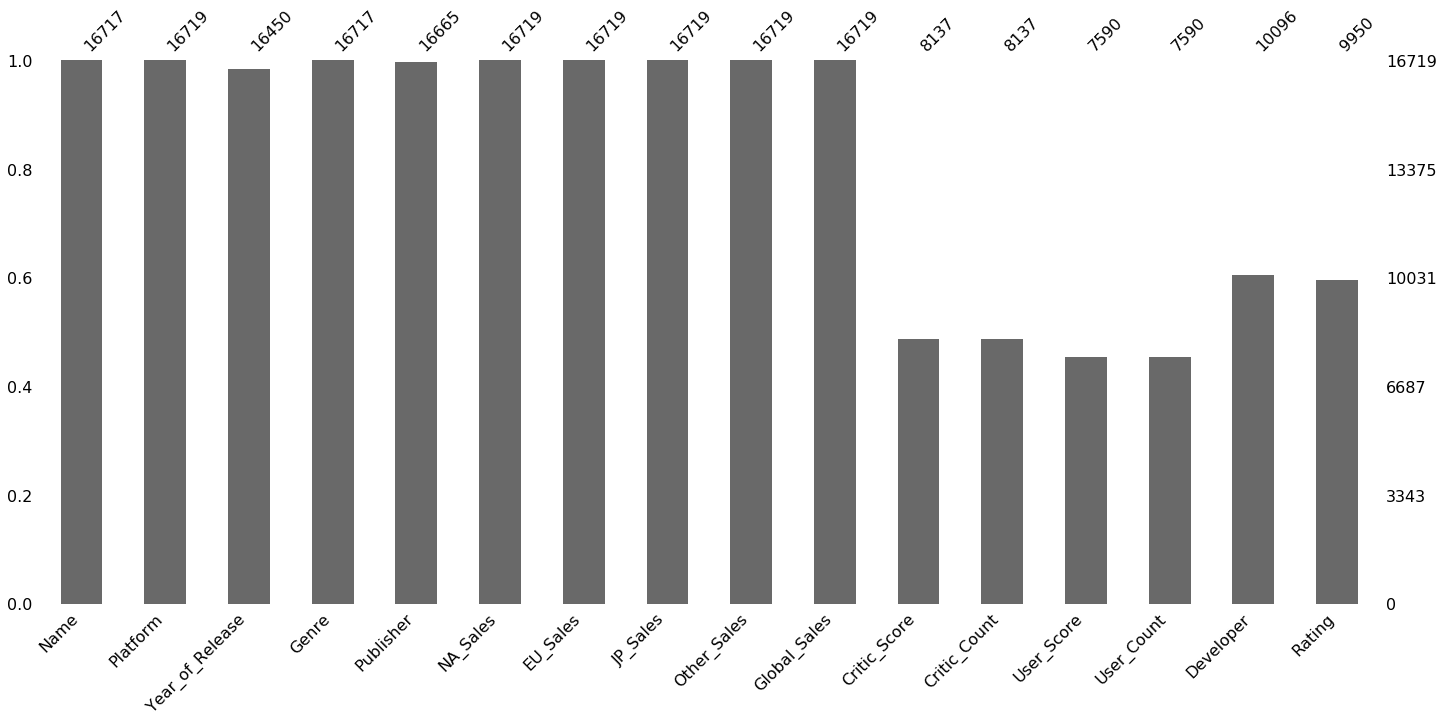

In [16]:
msno.bar(df)

In [17]:
df.columns[df.isnull().any()].tolist()

['Name',
 'Year_of_Release',
 'Genre',
 'Publisher',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'Developer',
 'Rating']

In [18]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [19]:
df.agg(['count', 'size', 'nunique'])

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16717,16719,16450,16717,16665,16719,16719,16719,16719,16719,8137,8137,7590,7590,10096,9950
size,16719,16719,16719,16719,16719,16719,16719,16719,16719,16719,16719,16719,16719,16719,16719,16719
nunique,11562,31,39,12,582,402,307,244,155,629,82,106,95,888,1696,8


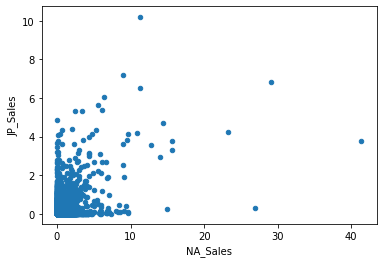

In [20]:
df.plot(kind='scatter',x='NA_Sales',y='JP_Sales')

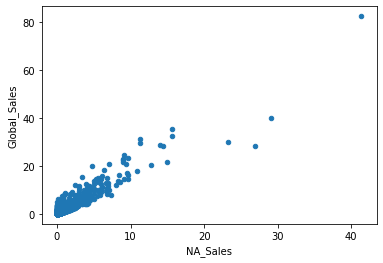

In [6]:
df.plot(kind='scatter',x='NA_Sales',y='Global_Sales')

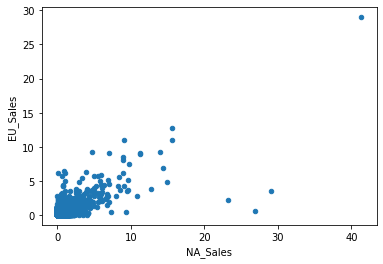

In [8]:
df.plot(kind='scatter',x='NA_Sales',y='EU_Sales')

Text(0.5, 1.0, 'Frecuencia de Ventas NA')

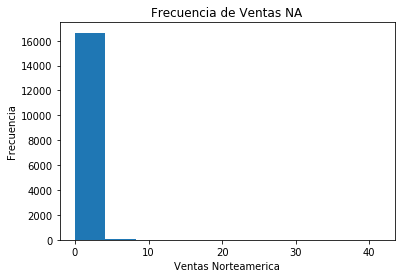

In [28]:
plt.hist(df['NA_Sales'])
plt.xlabel('Ventas Norteamerica')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Ventas NA')

Text(0.5, 1.0, 'Frecuencia de Ventas Europa')

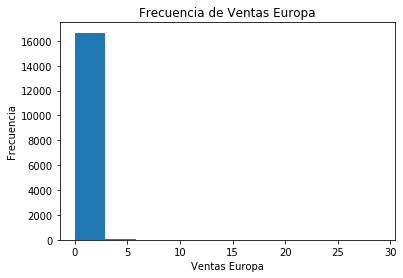

In [29]:
plt.hist(df['EU_Sales'])
plt.xlabel('Ventas Europa')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Ventas Europa')

Text(0.5, 1.0, 'Frecuencia de Ventas Japon')

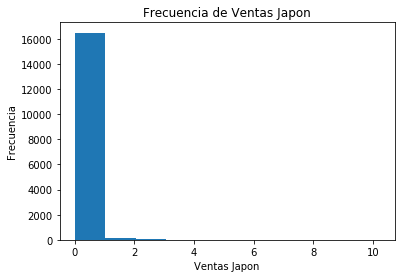

In [30]:
plt.hist(df['JP_Sales'])
plt.xlabel('Ventas Japon')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Ventas Japon')

Text(0.5, 1.0, 'Frecuencia de Ventas Globales')

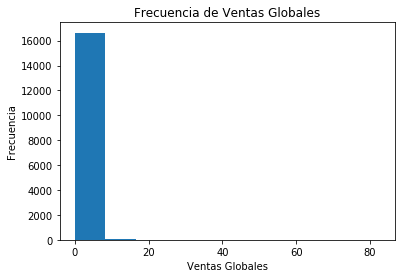

In [31]:
plt.hist(df['Global_Sales'])
plt.xlabel('Ventas Globales')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Ventas Globales')

Text(0.5, 1.0, 'Box Plot de Ventas NA count')

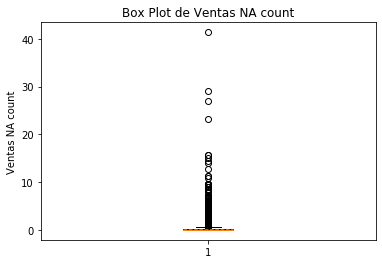

In [32]:
plt.boxplot(df['NA_Sales'], showmeans=True, meanline=True)
plt.ylabel('Ventas NA count')
plt.title('Box Plot de Ventas NA count')

Text(0.5, 1.0, 'Box Plot de Ventas EU count')

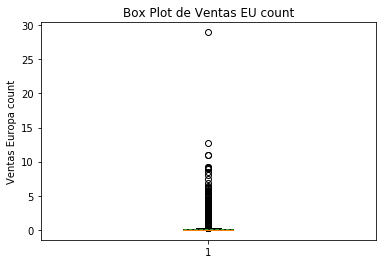

In [33]:
plt.boxplot(df['EU_Sales'], showmeans=True, meanline=True)
plt.ylabel('Ventas Europa count')
plt.title('Box Plot de Ventas EU count')

Text(0.5, 1.0, 'Box Plot de Ventas Japon count')

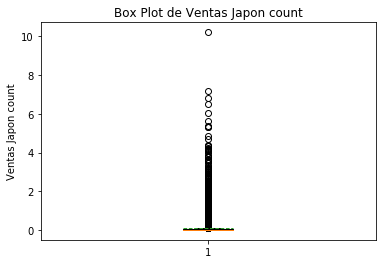

In [34]:
plt.boxplot(df['JP_Sales'], showmeans=True, meanline=True)
plt.ylabel('Ventas Japon count')
plt.title('Box Plot de Ventas Japon count')

Text(0.5, 1.0, 'Box Plot de Ventas Globales count')

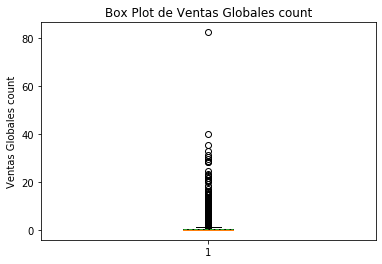

In [35]:
plt.boxplot(df['Global_Sales'], showmeans=True, meanline=True)
plt.ylabel('Ventas Globales count')
plt.title('Box Plot de Ventas Globales count')